![Screenshot (5).png](<attachment:Screenshot (5).png>)

# List of Table

# List of Figure


# Problem statement/ Objective


##### The primary objective of this analysis is to leverage historical EV registration data to understand the current market penetration of EVs, predict future market growth, and identify key trends and factors driving market expansion. 

## Data
The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States
### Data description
*	VIN (1-10): Partial Vehicle Identification Number.
*	County: The county in which the vehicle is registered.
*	City: The city in which the vehicle is registered.
*	State: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.
*	Postal Code: The postal code where the vehicle is registered.
*	Model Year: The year of the vehicle model 
*	Make: The manufacturer of the vehicle.
*	Model: The model of the vehicle.
*	Electric Vehicle Type: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
*	Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for clean alternative fuel vehicle programs.
*	Electric Range: The maximum range of the vehicle on a single charge (in miles).
*	Base MSRP: The Manufacturer’s Suggested Retail Price.
*	Legislative District: The legislative district where the vehicle is registered.
*	DOL Vehicle ID: Department of Licensing Vehicle Identification.
*	Vehicle Location: Geographic coordinates of the vehicle location.
*	Electric Utility: The electric utility service provider for the vehicle’s location.
	2020 Census Tract: The census tract for the vehicle’s location.


## Basic Steps:
* 1-	Display the top 5 rows.
* 2-	Display the last 5 rows
* 3-	Check the shape of dataset.
* 4-	Check the datatypes of each feature.
* 5-	Check the Statistical summary 
* 6-	Check the null values
* 7-	Check the duplicate values
* 8-	Check the anomalies or wrong entries.
* 9-	Check the outliers and their authenticity.
* 10-	Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\hd c\\Desktop\\prac\\6-Electric_Vehicle_Population_Data New.csv")

C:\Users\hd c\AppData\Local\Temp\ipykernel_16328\1142261020.py:1: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\hd c\\Desktop\\prac\\6-Electric_Vehicle_Population_Data New.csv")


### 1- Display the top 5 rows.

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),NaN,270,0,36,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,NaN,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


## Observation:
*	Base MSRP: The Manufacturer’s Suggested Retail Price can not be 0
*	Electric Range: The maximum range of the vehicle on a single charge (in miles) can not be 0 and its datatype is also not correct so it may contain a string.
*	Postal Code: The postal code where the vehicle is registered : can be changed to int datatype


### 2- Display the last 5 rows


In [5]:
df.tail()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177865,5YJ3E1EA8M,Pierce,Tacoma,WA,98422.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,27.0,211464683,POINT (-122.38578 47.28971),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10


### 3- Check the shape of dataset.

In [6]:
df.shape


(177866, 17)

### 4- Check the datatypes of each feature.


In [7]:
df.dtypes


VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                        object
Base MSRP                                              int64
Legislative District                                  object
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

### 5- Check the Statistical summary


In [8]:
df.describe()

,Postal Code,Model Year,Base MSRP,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,1073.109363,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,8358.624956,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,0.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,845000.000000,4.792548e+08,5.603300e+10


### Observation:
* Base MSRP should not contain 0 as its minimum so it may contain wrong entries
* postal code and dol vehicle id are categorical columns
* 
* 

### 6- Check the null values


In [9]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   7
Model                                                  4
Electric Vehicle Type                                  6
Clean Alternative Fuel Vehicle (CAFV) Eligibility      2
Electric Range                                         3
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

### Observation:
* max number of null values are present in legislative district

### 7- Check the duplicate values


In [10]:
df.duplicated().sum()


0

### Observation:
* no duplicate values present 

### 8- Check the outliers and their authenticity.


<Axes: >

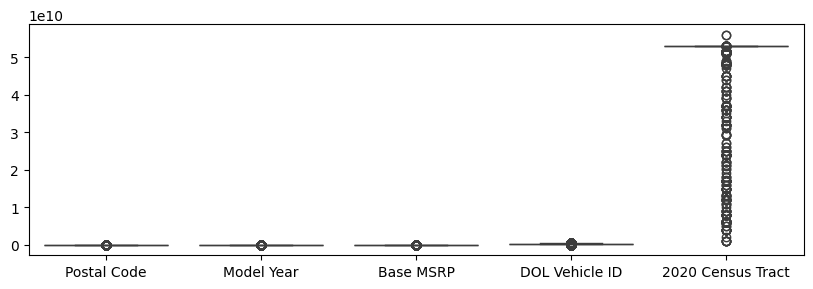

In [11]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df)

### Observation:
* 2020 Census Tract contain max number of outliers

### 9- Check the anomalies or wrong entries.
* as we know that the datatype of electric range is object so it may contain string.
* the values in Base MSRP seems to be wrong entry 

In [12]:
df['Electric Range'].value_counts()

Electric Range
0          74987
0          16962
215         5125
25          3480
220         3376
           ...  
36             1
95             1
59             1
1260000        1
11             1
Name: count, Length: 203, dtype: int64

### Observation:
* still did'nt got any string. so now we'll try to find the string by using error

In [13]:
# df['Electric Range']=df['Electric Range'].astype(float)

## Observation:
* Electric range column was having "? " that's whyy its data type was object
* and same goes for Legislative District

In [14]:
df[df['Electric Range']=="?"].value_counts().sum()

1

In [15]:

df['Legislative District']=df['Legislative District'].replace('?',np.nan)
df['Electric Range']=df['Electric Range'].replace('?',np.nan)
df["Postal Code"]=df["Postal Code"].astype(float)
df['Electric Range']=df['Electric Range'].astype(float)
df['Legislative District']=df['Legislative District'].astype(float)
df["Base MSRP"]=df["Base MSRP"].astype(int)

### Observation:
* replaced ? from both columns
* chnaged the data type of postal code to int
* as msrp is a usefull column so have the best way is to analyse the columns that are filled or havingdata other than 0

In [16]:
df1=df[df["Base MSRP"]!=0]

In [17]:
df1.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
30,KNDJX3AE9H,Thurston,Olympia,WA,98502.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,32250,22.0,140569600,POINT (-122.92145 47.045935),PUGET SOUND ENERGY INC,5.306701e+10
71,KNDJX3AE5G,Snohomish,Edmonds,WA,98020.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950,32.0,158961099,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
187,5YJSA1DN6D,Yakima,Yakima,WA,98903.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900,14.0,156737612,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
218,5YJSA1CG6D,Kitsap,Port Orchard,WA,98367.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900,26.0,124244284,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
293,WBA8E1C52H,King,Tukwila,WA,98168.0,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,44100,11.0,139331412,POINT (-122.286465 47.476),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10


In [18]:
df1.shape

(3344, 17)

In [19]:
df1.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,3343.000000,3344.000000,3344.000000,3344.000000,3331.000000,3.344000e+03,3.343000e+03
mean,98127.186360,2015.608254,121.796053,57078.250598,30.270790,2.088518e+08,5.297660e+10
std,2821.724578,2.483858,89.990565,22795.518132,14.598179,9.800860e+07,1.467693e+09
min,20152.000000,2008.000000,12.000000,31950.000000,1.000000,8.981300e+04,6.013313e+09
25%,98045.000000,2013.000000,17.000000,39995.000000,20.000000,1.449287e+08,5.303301e+10
50%,98119.000000,2016.000000,93.000000,59900.000000,34.000000,1.962603e+08,5.303303e+10
75%,98367.000000,2018.000000,208.000000,69900.000000,43.000000,2.512122e+08,5.305307e+10
max,99403.000000,2020.000000,265.000000,845000.000000,49.000000,4.788591e+08,5.307700e+10


<Axes: >

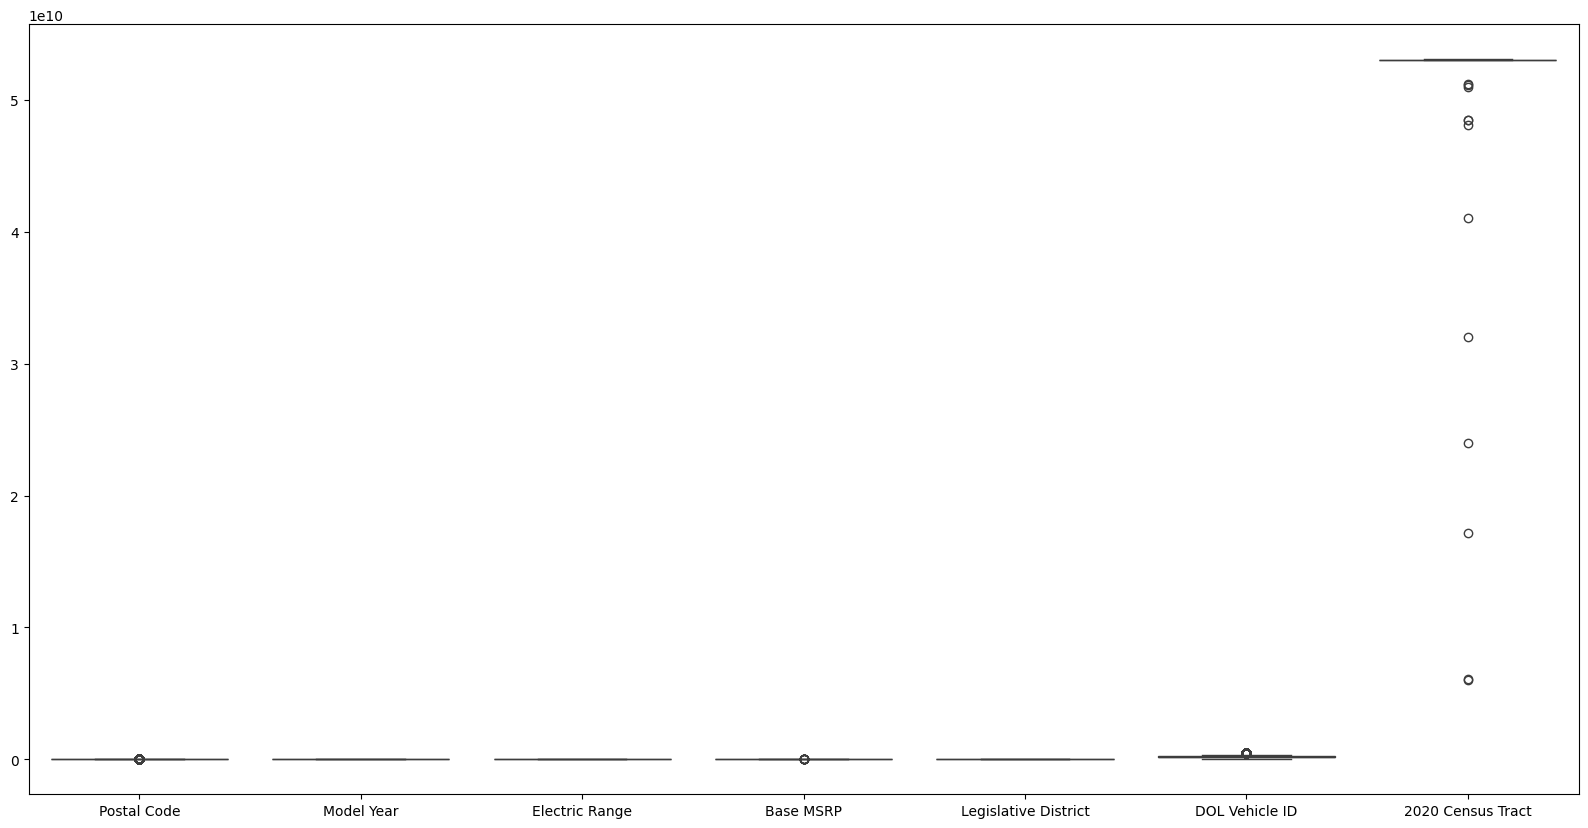

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1)

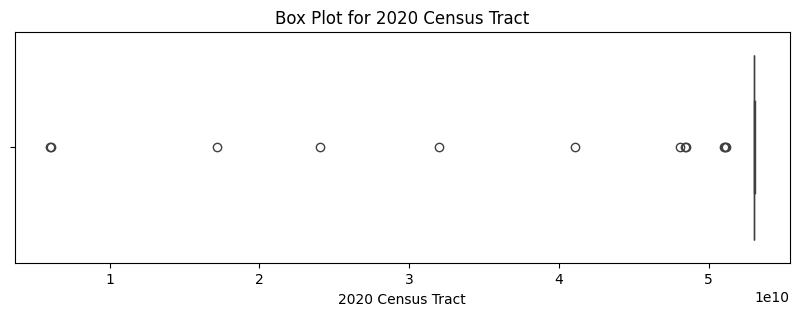

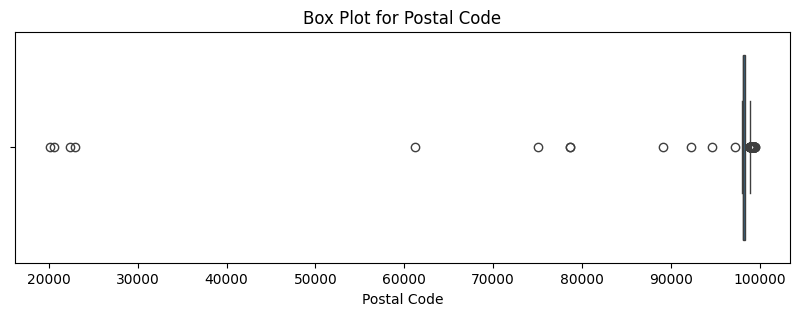

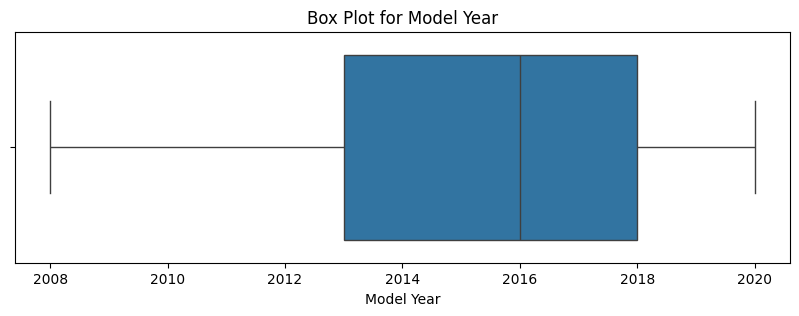

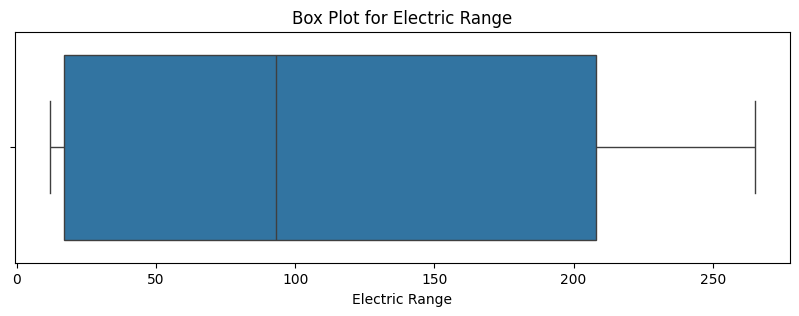

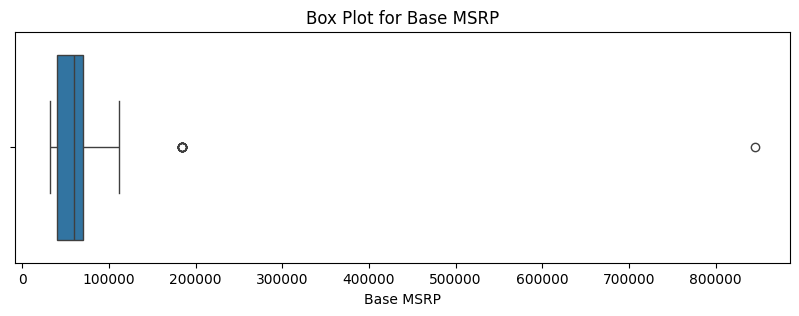

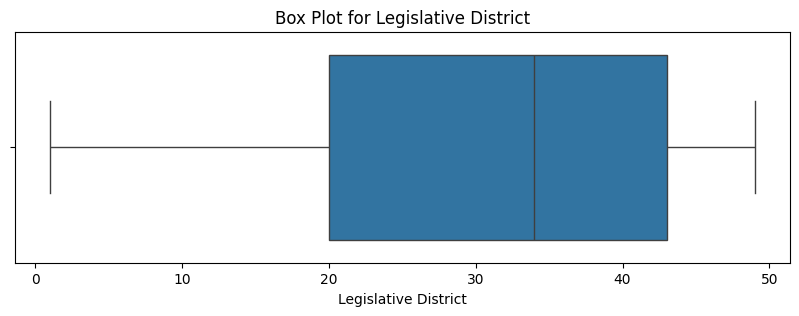

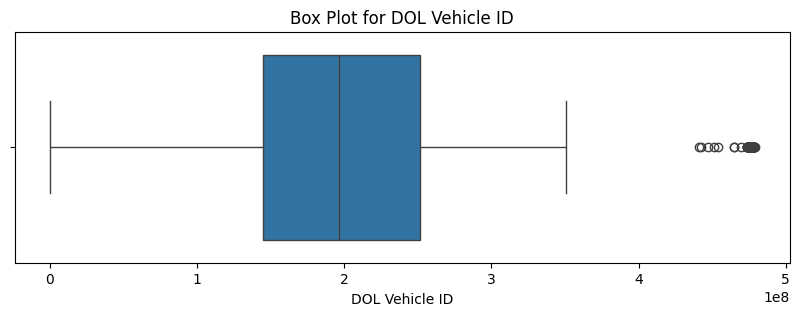

In [21]:
for i in ['2020 Census Tract','Postal Code','Model Year','Electric Range','Base MSRP','Legislative District','DOL Vehicle ID']:
    plt.figure(figsize=(10,3))
    sns.boxplot(data = df1, x=i)
    plt.title(f'Box Plot for {i}')
    plt.show()

### 10- Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.


#### Droping Duplicates:
* no duplicates there in data

### Outliers treatement:


In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

for i in df1.columns:
    if df1[i].dtype !='object':
        lr,ur=remove_outlier(df1[i])
        df1[i]=np.where(df1[i]>ur,ur,df1[i])
        df1[i]=np.where(df1[i]<lr,lr,df1[i])

C:\Users\hd c\AppData\Local\Temp\ipykernel_16328\1004908716.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=np.where(df1[i]>ur,ur,df1[i])
C:\Users\hd c\AppData\Local\Temp\ipykernel_16328\1004908716.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=np.where(df1[i]<lr,lr,df1[i])
C:\Users\hd c\AppData\Local\Temp\ipykernel_16328\1004908716.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

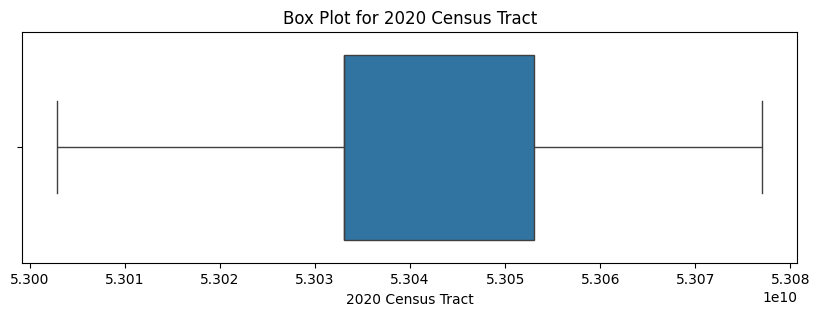

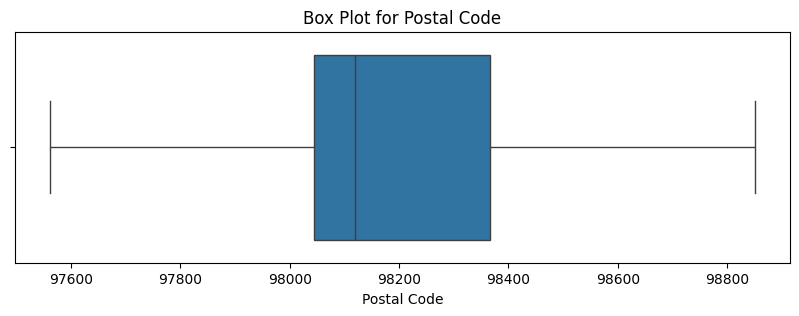

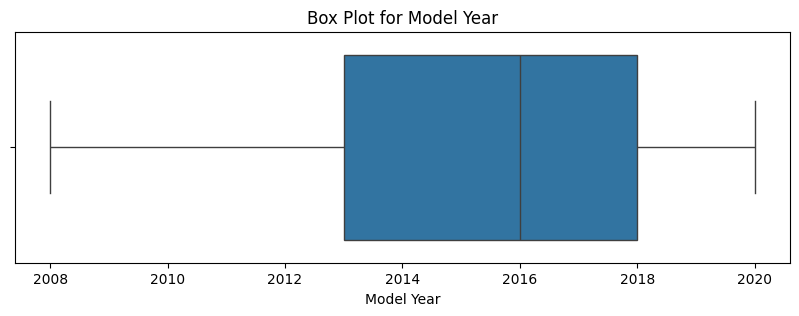

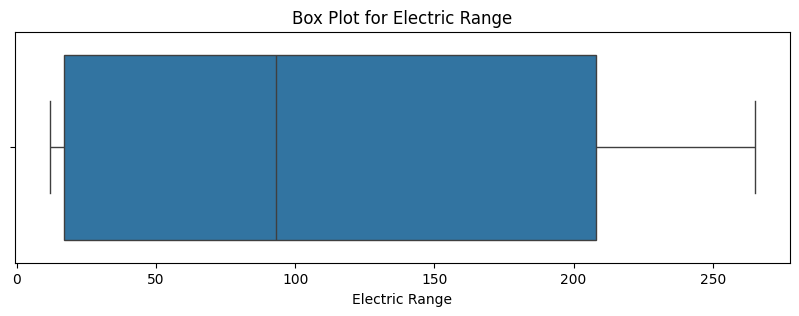

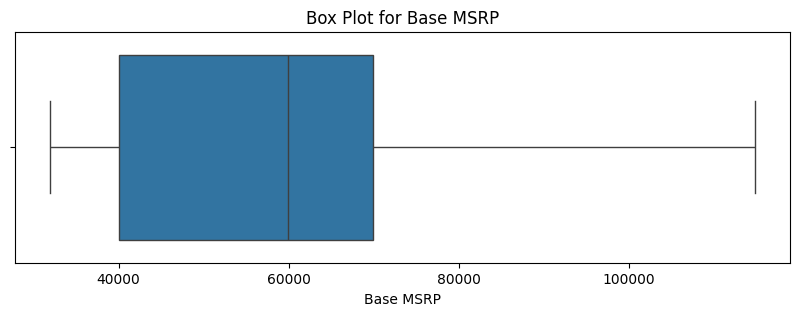

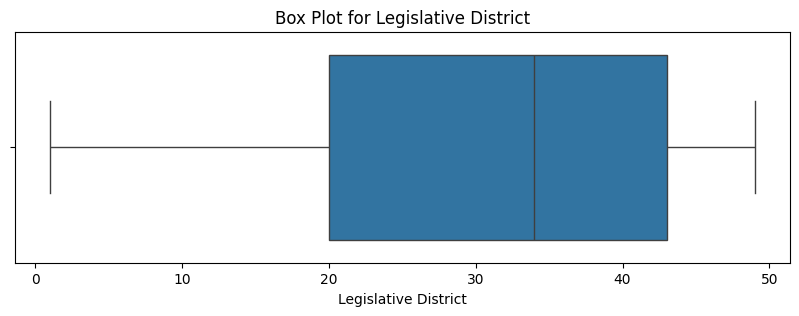

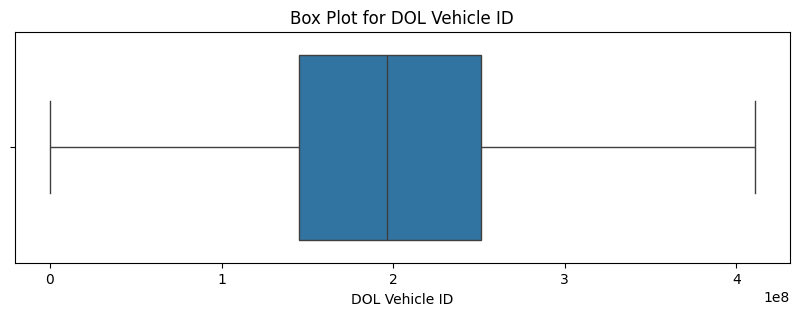

In [23]:
# plt.figure(figsize=(20,10))
# sns.boxplot(data=df1)
for i in ['2020 Census Tract','Postal Code','Model Year','Electric Range','Base MSRP','Legislative District','DOL Vehicle ID']:
    plt.figure(figsize=(10,3))
    sns.boxplot(data = df1, x=i)
    plt.title(f'Box Plot for {i}')
    plt.show()

### Null value imputation:


In [24]:
df1.isnull().sum()

VIN (1-10)                                            0
County                                                1
City                                                  1
State                                                 0
Postal Code                                           1
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                 13
DOL Vehicle ID                                        0
Vehicle Location                                      1
Electric Utility                                      1
2020 Census Tract                                     1
dtype: int64

In [25]:
df1.loc[df1["Postal Code"].isnull()==True,"Postal Code"]=98847.0
df1.loc[df1["Legislative District"].isnull()==True,"Legislative District"]=41.0
df1.loc[df1["Make"].isnull()==True,"Make"]="TESLA"
df1.loc[df1["Model"].isnull()==True,"Model"]="MODEL Y"
df1.loc[df1["Electric Vehicle Type"].isnull()==True,"Electric Vehicle Type"]="Battery Electric Vehicle (BEV)"
df1.loc[df1["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].isnull()==True,"Clean Alternative Fuel Vehicle (CAFV) Eligibility"]="Eligibility unknown as battery range has not b..."
df1.loc[df1["Electric Range"].isnull()==True,"Electric Range"]=0.0
df1.loc[df1["Vehicle Location"].isnull()==True,"Vehicle Location"]="POINT (-122.12302 47.67668)"
df1.loc[df1["2020 Census Tract"].isnull()==True,"2020 Census Tract"]=5.303303e+10
df1.loc[df1["Electric Utility"].isnull()==True,"Electric Utility"]="PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)"
df1.loc[df1["County"].isnull()==True,"County"]="King"
df1.loc[df1["City"].isnull()==True,"City"]="Seattle"


In [26]:
df1.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# 1.	Descriptive Statistics:
* What are the mean, median, and standard deviation of the base MSRP for the vehicles in the dataset?

In [27]:
df1['Base MSRP']=df1['Base MSRP'].astype(int)

mean_base_msrp = df1['Base MSRP'].mean()
median_base_msrp = df1['Base MSRP'].median()
std_base_msrp = df1['Base MSRP'].std()

print(f"The mean of 'Base MSRP' is: {mean_base_msrp}")
print(f"The median of 'Base MSRP' is: {median_base_msrp}")
print(f"The standard deviation of 'Base MSRP' is: {std_base_msrp}")

The mean of 'Base MSRP' is: 56651.6139354067
The median of 'Base MSRP' is: 59900.0
The standard deviation of 'Base MSRP' is: 17210.48760715155


C:\Users\hd c\AppData\Local\Temp\ipykernel_16328\2969815637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Base MSRP']=df1['Base MSRP'].astype(int)


In [28]:
df1["Base MSRP"].describe()

count      3344.000000
mean      56651.613935
std       17210.487607
min       31950.000000
25%       39995.000000
50%       59900.000000
75%       69900.000000
max      114757.000000
Name: Base MSRP, dtype: float64

# 2.	Data Distribution:
*	What is the distribution of vehicle makes in the dataset? Represent it using a bar chart.


In [95]:
df_Makers=df1["Make"].value_counts().reset_index()
df_Makers

,Make,count
0,TESLA,1545
1,KIA,593
2,BMW,501
3,VOLVO,303
4,MINI,159
5,CHRYSLER,113
6,SUBARU,66
7,PORSCHE,34
8,CADILLAC,14
9,FISKER,13


In [100]:
plt.figure(figsize=(20,10))
px.bar(df_Makers,x="Make",y="count",title='Makers Distribution')

<Figure size 2000x1000 with 0 Axes>

# 3.	Model Year Analysis:
*	What are the most common model years in the dataset? Provide a frequency table and histogram.


In [31]:
f=df1["Model Year"].value_counts()
f

Model Year
2013.0    730
2018.0    660
2014.0    640
2019.0    469
2016.0    391
2017.0    239
2012.0    141
2010.0     23
2020.0     23
2008.0     20
2011.0      7
2015.0      1
Name: count, dtype: int64

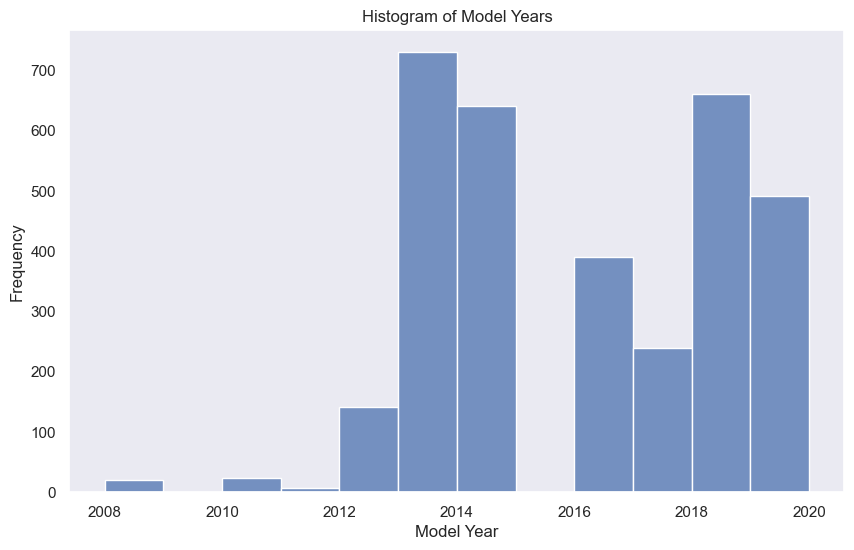

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Model Year'], bins=len(df1['Model Year'].unique()), kde=False)
plt.title('Histogram of Model Years')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

# 4.	Electric Vehicle Type:
*	What is the proportion of Battery Electric Vehicles (BEV) versus other types of electric vehicles?


In [33]:
e_type=df1["Electric Vehicle Type"].value_counts()
e_type

Electric Vehicle Type
Battery Electric Vehicle (BEV)            2138
Plug-in Hybrid Electric Vehicle (PHEV)    1206
Name: count, dtype: int64

In [34]:
e_total=e_type["Battery Electric Vehicle (BEV)"]+e_type['Plug-in Hybrid Electric Vehicle (PHEV)']
e_b=e_type["Battery Electric Vehicle (BEV)"]/e_total
e_o=e_type['Plug-in Hybrid Electric Vehicle (PHEV)']/e_total

print(f"Proportion of BEVs: {e_b:.2%}")
print(f"Proportion of Other EVs: {e_o:.2%}")

Proportion of BEVs: 63.94%
Proportion of Other EVs: 36.06%


Text(0.5, 1.0, 'proportion of Battery Electric Vehicles (BEV) versus other types of electric vehicles')

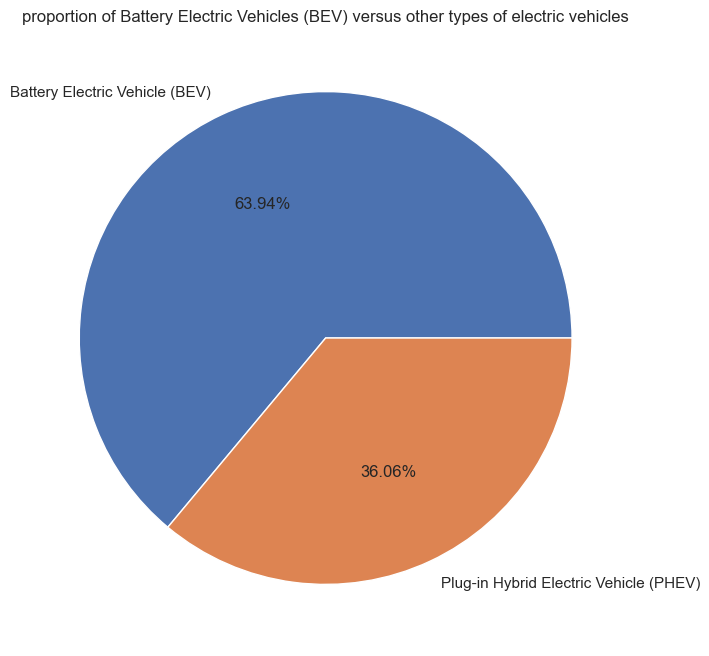

In [35]:
plt.figure(figsize=(10,8))
plt.pie(e_type.values, labels=e_type.index,autopct='%1.2f%%')
plt.title("proportion of Battery Electric Vehicles (BEV) versus other types of electric vehicles")

# 5.	Electric Range Analysis:
*	What is the average electric range for vehicles of different makes? Provide a summary table.


In [36]:
e_r=df1.groupby(by="Make")['Electric Range'].mean().reset_index()
e_r

,Make,Electric Range
0,BMW,14.526946
1,CADILLAC,31.000000
2,CHRYSLER,32.000000
3,FISKER,33.000000
4,KIA,95.306914
5,MINI,12.000000
6,PORSCHE,13.941176
7,SUBARU,17.000000
8,TESLA,213.524272
9,VOLVO,17.534653


Text(0, 0.5, 'Average Electric Range')

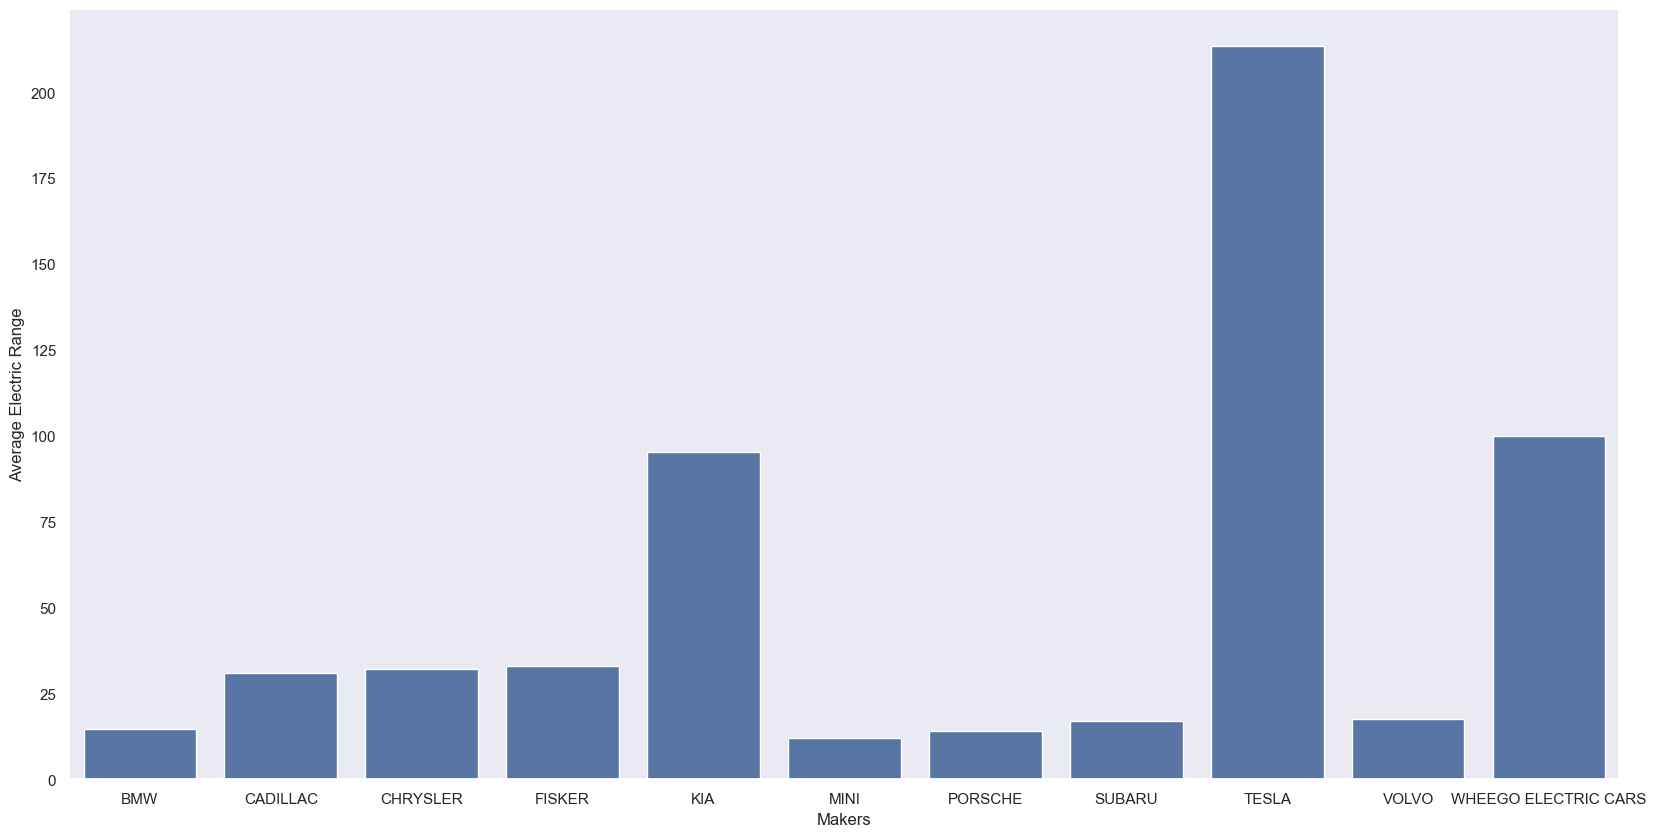

In [66]:
plt.figure(figsize=(20,10))
sns.barplot(data=e_r,x="Make",y="Electric Range")
plt.xlabel("Makers")
plt.ylabel("Average Electric Range")


# 6.	County Distribution:
*	How are vehicles distributed across different counties in Washington state? Represent the distribution using a pie chart.


In [37]:
v_d=df1[df1["State"]=="WA"].groupby("County")["County"].value_counts()
v_d

County
Asotin             2
Benton            37
Chelan            22
Clallam           15
Clark            172
Columbia           1
Cowlitz           16
Douglas           11
Franklin          13
Grant              8
Grays Harbor      15
Island            43
Jefferson         15
King            1721
Kitsap           138
Kittitas          13
Klickitat          5
Lewis             11
Lincoln            2
Mason             20
Okanogan           4
Pacific            6
Pierce           297
San Juan          29
Skagit            41
Skamania           2
Snohomish        359
Spokane           80
Stevens            2
Thurston          99
Wahkiakum          3
Walla Walla        9
Whatcom          101
Whitman            3
Yakima            16
Name: count, dtype: int64

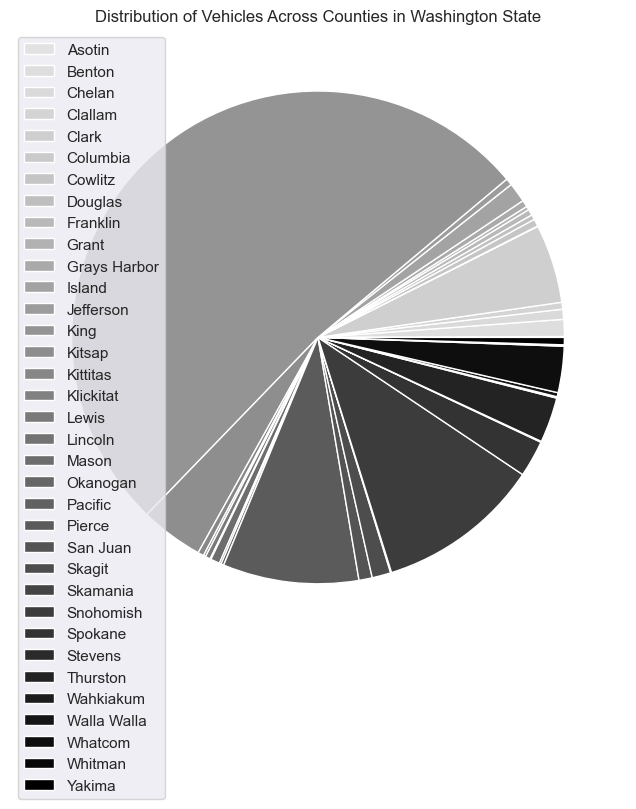

In [38]:
plt.figure(figsize=(10, 8))
plt.gca().set_aspect('equal')
colors = [plt.cm.Greys(i) for i in np.linspace(0.2, 1, len(v_d.index))]
plt.pie(v_d.values,colors=colors)
plt.legend(v_d.index, loc='upper left')
plt.title('Distribution of Vehicles Across Counties in Washington State')
plt.ylabel('')  
plt.show()

# 7.	Price Analysis:
*	Compare the average base MSRP of vehicles eligible for the Clean Alternative Fuel Vehicle (CAFV) program versus those that are not.


In [39]:
d_e=df1.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')["Base MSRP"].mean().reset_index()
d_e

,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP
0,Clean Alternative Fuel Vehicle Eligible,58976.808417
1,Not eligible due to low battery range,51662.179680


# 8.	Geographical Analysis:
*	How does the base MSRP vary across different cities in Washington state?


In [92]:
d_m=df1[df1["State"]=="WA"].groupby("City")["Base MSRP"].mean().reset_index()
d_m


,City,Base MSRP
0,Aberdeen,53800.000000
1,Airway Heights,32250.000000
2,Allyn,45600.000000
3,Anacortes,56392.857143
4,Anderson Island,52266.666667
...,...,...
227,Yacolt,62425.000000
228,Yakima,58449.166667
229,Yarrow Point,57912.500000
230,Yelm,57657.142857


In [93]:
import plotly.express as px
px.bar(d_m,x="City",y="Base MSRP")

# 9.	Legislative Districts:
*	Which legislative districts have the highest number of registered electric vehicles? Provide a ranked list.


In [42]:
d_count=df1.groupby("Legislative District")["Legislative District"].value_counts().sort_values(ascending=False).reset_index()
d_count.index.name = 'ranking'
d_count.columns=["Legislative District","count"]
d_count.index = d_count.index + 1
d_count

,Legislative District,count
ranking,,
1,41.0,253
2,48.0,223
3,45.0,217
4,5.0,137
5,46.0,136
6,36.0,126
7,1.0,123
8,43.0,121
9,37.0,107


In [77]:
import plotly.express as px
px.bar(d_count,x="Legislative District",y="count")

# 10.	Electric Utility Providers:
*	What is the distribution of electric utility service providers for the vehicles in the dataset?


In [43]:
d_sp=df1["Electric Utility"].value_counts().reset_index()
d_sp

,Electric Utility,count
0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),1229
1,PUGET SOUND ENERGY INC,649
2,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),576
3,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,182
4,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,168
5,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,94
6,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,50
7,BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,37
8,BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,29
9,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,23


# 11.	Census Tract Analysis:
*	How are vehicles distributed across different 2020 Census Tracts? Provide insights based on vehicle counts per tract.


In [44]:
d_ct=df1["2020 Census Tract"].value_counts().reset_index()
d_ct

,2020 Census Tract,count
0,5.303301e+10,19
1,5.303302e+10,18
2,5.303302e+10,18
3,5.303303e+10,17
4,5.303303e+10,17
...,...,...
1120,5.304596e+10,1
1121,5.303301e+10,1
1122,5.307300e+10,1
1123,5.305306e+10,1


# 12.	Electric Range Correlation:
*	Is there a correlation between the electric range and the base MSRP of the vehicles? Provide the correlation coefficient and interpret the result.


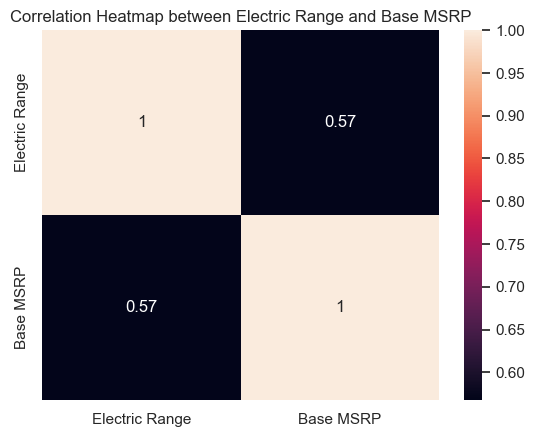

In [45]:
df_temp=df1[["Electric Range","Base MSRP"]]
sns.heatmap(df_temp.corr(),annot=True)
plt.title('Correlation Heatmap between Electric Range and Base MSRP')
plt.show()


# Observation:
* A correlation coefficient of 0.57 indicates a moderate positive linear relationship between electric range and base MSRP, suggesting that as electric range increases, base MSRP tends to increase as well, but not perfectly.

# 13.	VIN Analysis:
*	Identify any patterns or commonalities in the VIN (1-10) for the vehicles. Are there any frequent prefixes or suffixes?


In [46]:
df1.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
30,KNDJX3AE9H,Thurston,Olympia,WA,98502.0,2017.0,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,32250,22.0,140569600.0,POINT (-122.92145 47.045935),PUGET SOUND ENERGY INC,5.306701e+10
71,KNDJX3AE5G,Snohomish,Edmonds,WA,98020.0,2016.0,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950,32.0,158961099.0,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
187,5YJSA1DN6D,Yakima,Yakima,WA,98850.0,2013.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900,14.0,156737612.0,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
218,5YJSA1CG6D,Kitsap,Port Orchard,WA,98367.0,2013.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900,26.0,124244284.0,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
293,WBA8E1C52H,King,Tukwila,WA,98168.0,2017.0,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,44100,11.0,139331412.0,POINT (-122.286465 47.476),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
297,KNDJP3AE9G,King,Seattle,WA,98115.0,2016.0,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950,46.0,132238795.0,POINT (-122.3185 47.67949),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
315,WBA8E1C55J,King,Kirkland,WA,98034.0,2018.0,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,45600,45.0,292913484.0,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
366,5YJSA1H13E,King,Newcastle,WA,98059.0,2014.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900,41.0,220971803.0,POINT (-122.15734 47.487175),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
461,5YJSA1H11E,King,Kirkland,WA,98034.0,2014.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900,45.0,222335347.0,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
527,KNDJX3AE4G,King,Bothell,WA,98011.0,2016.0,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950,1.0,348116121.0,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [47]:
vin_series = df1['VIN (1-10)']
vin_prefixes = vin_series.apply(lambda x: x[:6])
vin_suffixes = vin_series.apply(lambda x: x[-4:])
prefix_counts = vin_prefixes.value_counts()
suffix_counts = vin_suffixes.value_counts()
print("Frequent VIN Prefixes:",prefix_counts.shape)
print(prefix_counts.head())
print("\nFrequent VIN Suffixes:",suffix_counts.shape)
print(suffix_counts.head()) 

Frequent VIN Prefixes: (22,)
VIN (1-10)
5YJSA1    1498
KNDJX3     382
KNDJP3     211
WBA8E1     184
WBAJB1     180
Name: count, dtype: int64

Frequent VIN Suffixes: (449,)
VIN (1-10)
H1XE    52
H19E    47
H11E    46
H18E    46
H17E    45
Name: count, dtype: int64


# 14.	Eligibility Status:
*	What percentage of vehicles are eligible for the Clean Alternative Fuel Vehicle (CAFV) program?


In [48]:
df_cafv=df1["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts().reset_index()
df_cafv

,Clean Alternative Fuel Vehicle (CAFV) Eligibility,count
0,Clean Alternative Fuel Vehicle Eligible,2281
1,Not eligible due to low battery range,1063


In [49]:
total=df1["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].count()
print("Percentage of vehicle eligible for clean alternative fuel vehicle(CAFV) program:",(df_cafv.loc[0,"count"]*100)/total)

Percentage of vehicle eligible for clean alternative fuel vehicle(CAFV) program: 68.21172248803828


# 15.	Model Popularity:
*	Which vehicle models are the most popular in the dataset? Provide a frequency table of the top 10 models.


In [50]:
df_mp=df1["Model"].value_counts().sort_values(ascending=False).reset_index()
df_mp.head(10)

,Model,count
0,MODEL S,1498
1,SOUL,381
2,530E,285
3,XC60,222
4,SOUL EV,212
5,330E,184
6,COUNTRYMAN,159
7,PACIFICA,113
8,XC90,81
9,CROSSTREK,66


# 16.	Postal Code Distribution:
*	How are vehicles distributed across different postal codes? Provide a heatmap or density plot.


In [51]:
df_pcd=df1["Postal Code"].value_counts().sort_values(ascending=False).reset_index()
df_pcd

,Postal Code,count
0,98850.0,181
1,98072.0,72
2,98004.0,70
3,98033.0,69
4,98052.0,68
...,...,...
270,98846.0,1
271,98555.0,1
272,98326.0,1
273,98844.0,1


<Axes: >

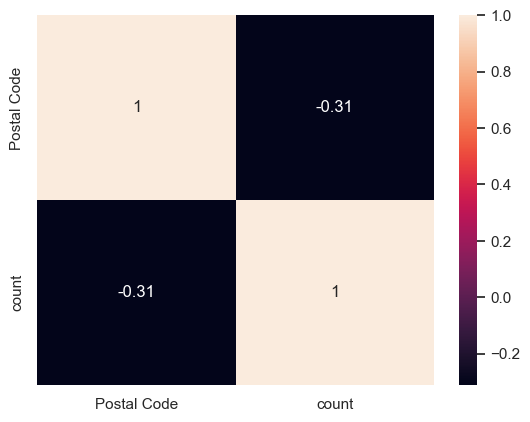

In [52]:
df_temp=df_pcd[["Postal Code","count"]]
sns.heatmap(df_temp.corr(),annot=True)

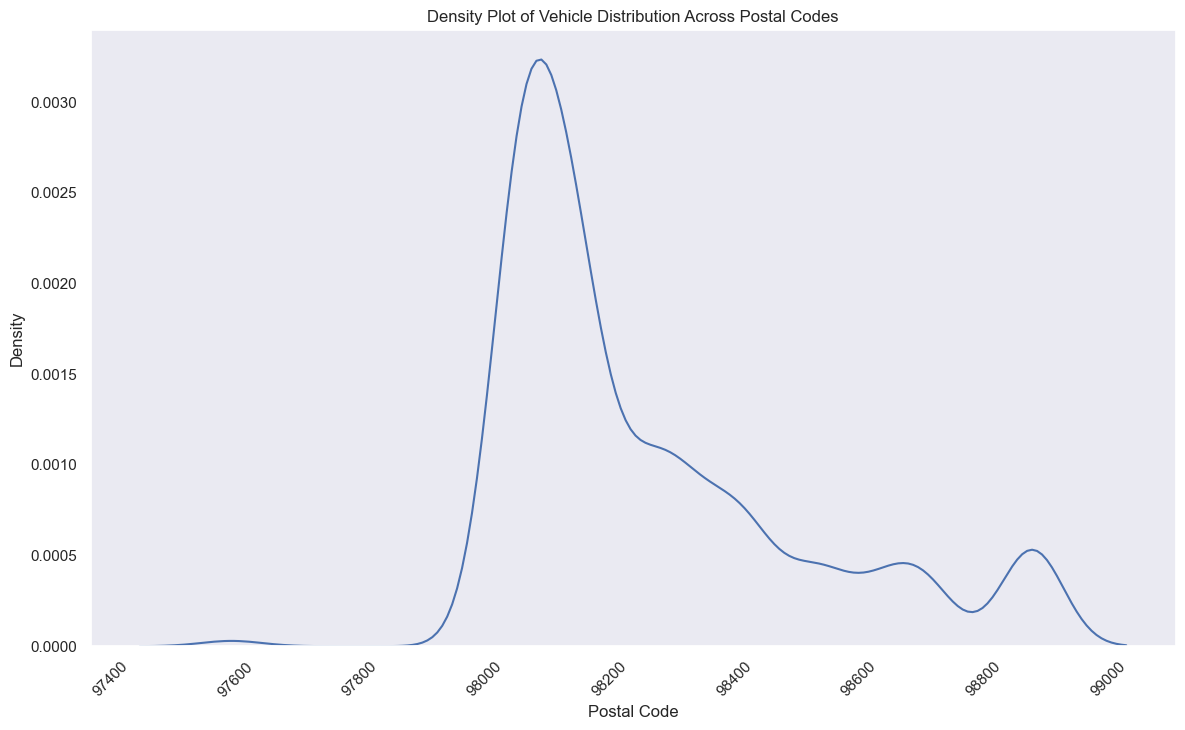

In [53]:
# plt.figure(figsize=(10, 6))
# sns.kdeplot(df_pcd['Postal Code'], shade=True, color='blue')
# plt.title('Density Plot of Postal Code')
# plt.xlabel('Postal Code')
# plt.ylabel('Density')
# plt.show()

plt.figure(figsize=(14, 8))
sns.kdeplot(data=df1, x='Postal Code')
plt.title('Density Plot of Vehicle Distribution Across Postal Codes')
plt.xlabel('Postal Code')
plt.ylabel('Density')
plt.xticks(rotation=45, ha='right')
plt.show()

In [113]:
plt.figure(figsize=(20,10))
px.scatter(df_pcd, x='Postal Code',y='count')

<Figure size 2000x1000 with 0 Axes>

# 17.	Vehicle Location Analysis:
*	Analyze the geographic coordinates to determine any clusters of electric vehicles in certain areas of Washington state.


In [54]:
df1.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
30,KNDJX3AE9H,Thurston,Olympia,WA,98502.0,2017.0,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,32250,22.0,140569600.0,POINT (-122.92145 47.045935),PUGET SOUND ENERGY INC,5.306701e+10
71,KNDJX3AE5G,Snohomish,Edmonds,WA,98020.0,2016.0,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950,32.0,158961099.0,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
187,5YJSA1DN6D,Yakima,Yakima,WA,98850.0,2013.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900,14.0,156737612.0,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
218,5YJSA1CG6D,Kitsap,Port Orchard,WA,98367.0,2013.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900,26.0,124244284.0,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
293,WBA8E1C52H,King,Tukwila,WA,98168.0,2017.0,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,44100,11.0,139331412.0,POINT (-122.286465 47.476),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10


C:\Users\hd c\AppData\Local\Temp\ipykernel_16328\3846327931.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hd c\AppData\Local\Temp\ipykernel_16328\3846327931.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



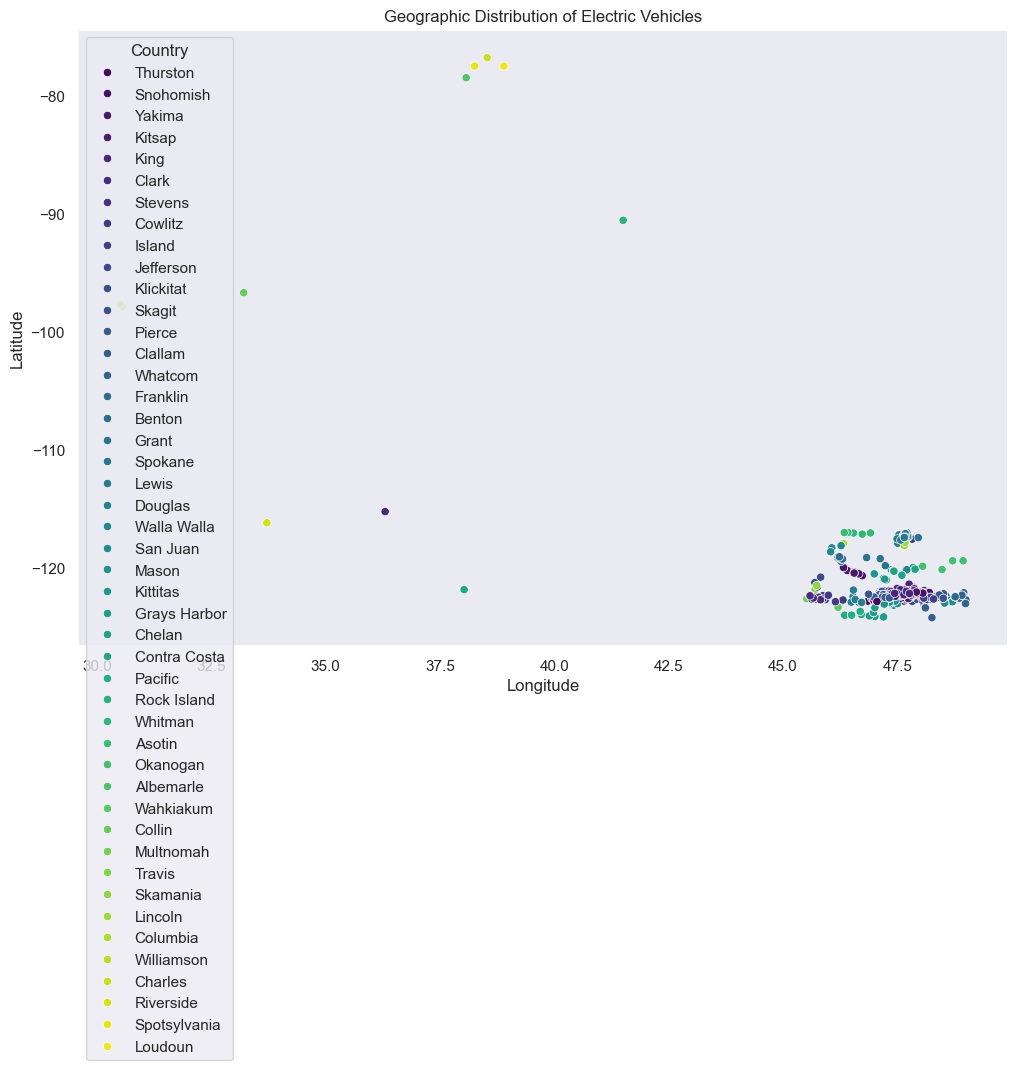

In [115]:
df1['Latitude'] = df1['Vehicle Location'].apply(lambda x: float(x.split(' ')[1].replace('(', '')))
df1['Longitude'] = df1['Vehicle Location'].apply(lambda x: float(x.split(' ')[2].replace(')', '')))

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude',hue='County', data=df1, palette='viridis')
plt.title('Geographic Distribution of Electric Vehicles')
plt.legend(title='Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Observation:
* we can see a cluster in ((-128 to -115),(45,48))

# 18.	Model Year Trend:
*	Analyze the trend in the number of registered electric vehicles by model year. Provide a line chart to show any increase or decrease over the years.


In [56]:
df_myt=df1.groupby("Model Year")["Model Year"].value_counts().reset_index()
df_myt

,Model Year,count
0,2008.0,20
1,2010.0,23
2,2011.0,7
3,2012.0,141
4,2013.0,730
5,2014.0,640
6,2015.0,1
7,2016.0,391
8,2017.0,239
9,2018.0,660


C:\Users\hd c\AppData\Local\Temp\ipykernel_16328\2709657860.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


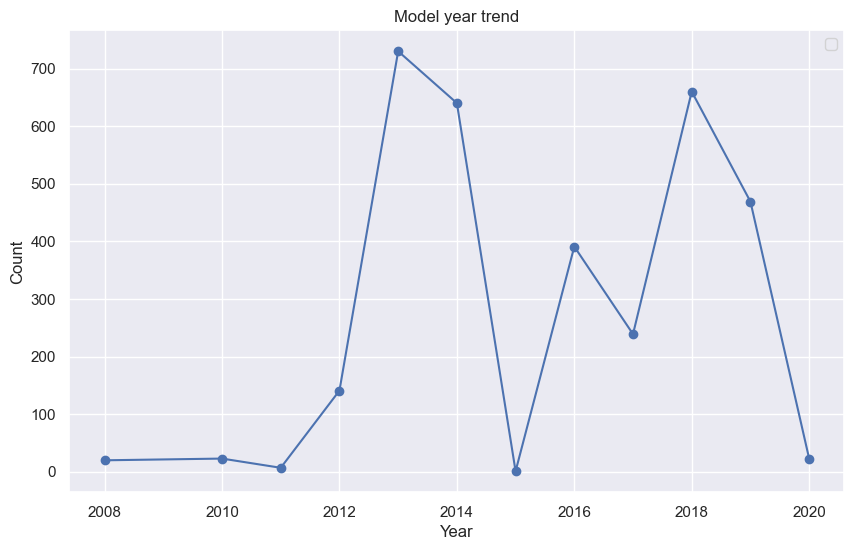

In [57]:
plt.figure(figsize=(10, 6)) 
plt.plot(df_myt["Model Year"], df_myt["count"], marker='o', linestyle='-', color='b')

plt.title('Model year trend')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)  
plt.legend()
plt.show()

# 19.	Range vs. Year:
*	Is there a trend between the model year and the electric range of the vehicles? Provide a scatter plot and analyze the trend.


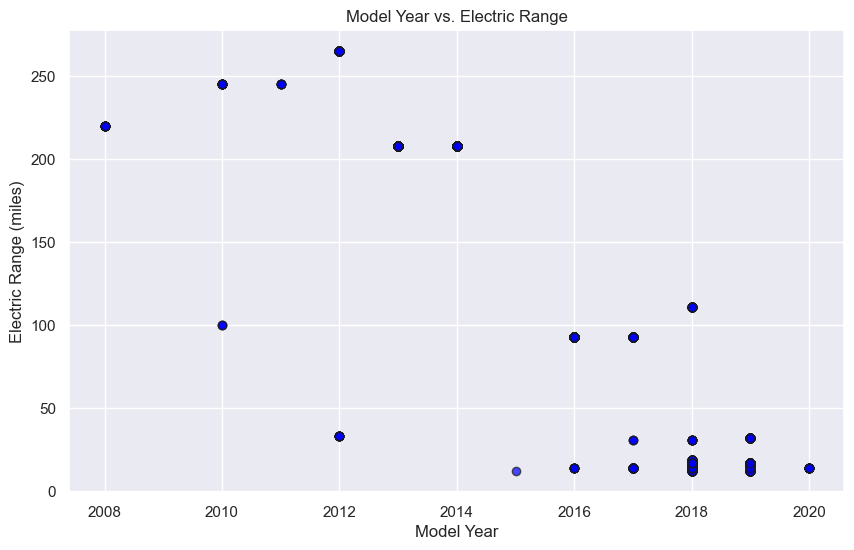

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Model Year'], df1['Electric Range'], color='blue', alpha=0.7, edgecolors='k')

plt.title('Model Year vs. Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.grid(True) 
plt.show()


# 20.	Legislative District and MSRP:
*	How does the average base MSRP vary across different legislative districts?



In [59]:
df_ldm=df1.groupby("Legislative District")["Base MSRP"].mean().reset_index()
df_ldm.head(10)

,Legislative District,Base MSRP
0,1.0,53173.048780
1,2.0,53436.097561
2,3.0,54271.071429
3,4.0,63718.965517
4,5.0,58327.189781
5,6.0,54396.333333
6,7.0,44081.363636
7,8.0,53761.666667
8,9.0,53914.615385
9,10.0,56114.029851
